<a href="https://colab.research.google.com/github/githubtaniya924/Data-Analysis-Internship/blob/main/TwoSampleTest_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary vs Binary variable

In [ ]:
import pandas as pd
data=pd.read_csv('StudentStatistics.csv', sep=';')
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [ ]:
data['Gen_Gender'].value_counts()

,count
Gen_Gender,
Male,34
Female,12


In [ ]:
data['Gen_SecSchool'].value_counts()

,count
Gen_SecSchool,
Others,31
The Netherlands,24


In [ ]:
data['Gen_SecSchool'][data['Gen_SecSchool'] != 'The Netherlands'] = 'Others'


In [ ]:
mycrosstab= pd.crosstab(data['Gen_Gender'],data['Gen_SecSchool'])

In [ ]:
mycrosstab

Gen_SecSchool,Others,The Netherlands
Gen_Gender,,
Female,4,8
Male,18,16


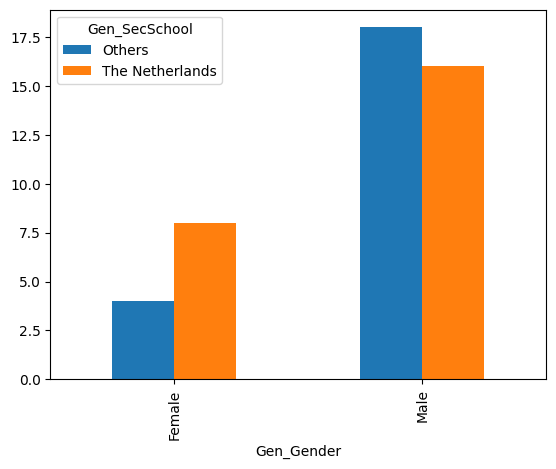

In [ ]:
import matplotlib.pyplot as plt
mycrosstab.plot(kind='bar')
plt.show()

In [ ]:
#fisher exact test

#h0-> there is no influence of gender on school location
#ha-> there is influence of gender on school location

from scipy.stats import fisher_exact
fisher_exact(mycrosstab)


SignificanceResult(statistic=0.4444444444444444, pvalue=0.32137504230527486)

In [ ]:
pvalue=0.321

#here pvalue > 0.05
#Therefore there is no eveidence to reject null hypothesis

In [ ]:
#assuming pvalue is < 0.05

#finding effect size using Odds Ratio
a=mycrosstab.iloc[0,0]
b=mycrosstab.iloc[0,1]
c=mycrosstab.iloc[1,0]
d=mycrosstab.iloc[1,1]

oddsRatio = (a/c) / (b/d)
oddsRatio

0.4444444444444444

In [ ]:
if oddsRatio < 1.5:
  print('negligible')
elif oddsRatio < 3.5:
  print('small')
elif oddsRatio < 6.5:
  print('medium')
else:
  print('large')

negligible


The fisher exact test did not find any influence of gender on school location (pvalue = 0.321)
The effect size is negligible odds Ratio = 0.444

## Binary vs Ordinal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data1 = pd.read_csv('StudentStatistics.csv', sep=';')
data1.head()

In [ ]:
import stikpetP as sp

In [ ]:
mycrosstab1=pd.crosstab(data1['Gen_Gender'],data1['Mix_NrAct'])
mycrosstab1

Mix_NrAct,Enough,Far too little,Far too much,Too much,too little
Gen_Gender,,,,,
Female,8,1,0,0,2
Male,15,1,2,14,2


In [ ]:
data1['Mix_NrAct'].value_counts().index

In [ ]:
coding = {'Far too little':0, 'too little':1, 'Enough':2, 'Too much':3, 'Far too much':4}
sp.vi_bar_stacked_multiple(data1['Gen_Gender'],data1['Mix_NrAct'],coding)

In [ ]:
myord = data1['Mix_NrAct'].replace(coding)

mybin1 = data1['Gen_Gender'] == 'Male'
mybin2 = data1['Gen_Gender'] == 'Female'

myord1 = myord[mybin1].dropna()
myord2 = myord[mybin2].dropna()


In [ ]:
from scipy.stats import mannwhitneyu
mannwhitneyu(myord1,myord2, alternative='two-sided', use_continuity=False)

MannwhitneyuResult(statistic=285.5, pvalue=0.0044363900107872375)

In [ ]:
pvalue=0.0044363900107872375
if(pvalue < 0.05):
  print('null hypothesis is rejected, Ha- There is influence of gender on number of activities')
else:
  print('null hypothesis is accepted, H0- There is no influence of gender on number of activities')

null hypothesis is rejected, Ha- There is influence of gender on number of activities


In [ ]:
#effect size - Rosenathal correlation coefficient

from scipy.stats import norm

z = norm.ppf(pvalue/2)

n = len(myord1) + len(myord2)

r_corr = abs(z / n**0.5)
r_corr

if r_corr < 0.2:
  print('negligible')
elif r_corr < 0.5:
  print('small')
elif r_corr < 0.8:
  print('medium')
else:
  print('large')

small


In [ ]:
#Result-
#The mann whitney U test has found that there is association/influence of gender on activities (pvalue - 0.004)
#Rosenathal correlation coefficient has found that the association/influence of gender on activities is small (r_corr = 0.42)

## Binary vs Scale

In [ ]:
data2 = pd.read_csv('StudentStatistics.csv', sep=';')
data2.head()

In [ ]:
data2['Over_Grade'].groupby(data2['Gen_Gender']).mean()

,Over_Grade
Gen_Gender,
Female,53.727273
Male,59.766667


In [ ]:
data2['Over_Grade'].groupby(data2['Gen_Gender']).std()

,Over_Grade
Gen_Gender,
Female,26.382157
Male,19.383042


In [ ]:
malescore = data2['Over_Grade'][data2['Gen_Gender'] == 'Male'].dropna()
femalescore = data2['Over_Grade'][data2['Gen_Gender'] == 'Female'].dropna()

(array([1., 1., 2., 1., 0., 2., 3., 0., 1.]),
 array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 9 artists>)

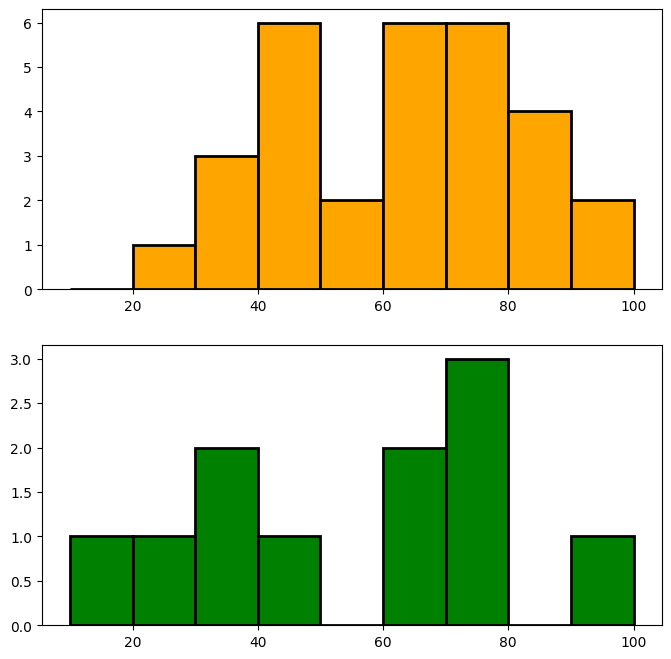

In [ ]:
plt.figure(1,figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(malescore, lw=2, edgecolor='black', color='orange', bins=[10,20,30,40,50,60,70,80,90,100])

plt.subplot(2,1,2)
plt.hist(femalescore, lw=2, edgecolor='black', color='green', bins=[10,20,30,40,50,60,70,80,90,100])

In [ ]:
from scipy.stats import ttest_ind

# welch t test
print(ttest_ind(malescore,femalescore, equal_var=False))

# student t test
print(ttest_ind(malescore,femalescore))

TtestResult(statistic=0.6936894455945684, pvalue=0.4991001245520197, df=14.158919197596669)
TtestResult(statistic=0.8007631996644367, pvalue=0.428120221815538, df=39.0)


In [ ]:
pvalue=0.4991
if(pvalue < 0.05):
  print('null hypothesis is rejected, Ha- There is influence of gender on grade')
else:
  print('null hypothesis is accepted, H0- There is no influence of gender on grade')


null hypothesis is accepted, H0- There is no influence of gender on grade


In [ ]:
#assuming that pvalue < 0.05
#effect size - cohen d_s

sp.es_hedges_g_is(data2['Gen_Gender'],data2['Over_Grade'])

cohen_d=0.282253

if cohen_d < 0.1:
  print('negligible')
elif cohen_d < 0.3:
  print('small')
elif cohen_d < 0.5:
  print('medium')
else:
  print('large')

small


In [ ]:
#Result -
# Welch t test has found that null hypothesis cannot be rejected i.e there is no association between gender and marks scored (pvalue- )


## Nominal vs Nominal (Two nominal data)

In [ ]:
data3 = pd.read_csv('GSS2012a.csv')
data3.head()

<ipython-input-54-29d4eeefa60b>:1: DtypeWarning: Columns (11,115,123,187,274,284,287,288,290,291,292,397,585,595,628,632) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv('GSS2012a.csv')


,year,id,mar1,BMITZVAH,accntsci,age,sex,life,ENGDO,SCIENTBR,...,wrksch,wrkslf,wrkstat,wrkwayup,wwwhr,wwwmin,xmarsex,xmovie,xnorcsiz,zodiac
0,2012.0,1.0,MARRIED,NaN,NaN,22.0,MALE,EXCITING,NaN,NaN,...,WORK PART-TIME,SOMEONE ELSE,WORKING PARTTIME,AGREE SOMEWHAT,5.0,NaN,ALWAYS WRONG,NaN,"UNINC,MED CITY",LIBRA
1,2012.0,6.0,DIVORCED,NaN,NaN,50.0,FEMALE,NaN,NaN,NaN,...,WORK FULL-TIME,SOMEONE ELSE,OTHER,AGREE SOMEWHAT,0.0,0.0,SOMETIMES WRONG,NaN,"CITY,50-250000",TAURUS
2,2012.0,7.0,MARRIED,NaN,NaN,35.0,FEMALE,NaN,NaN,NaN,...,NaN,SOMEONE ELSE,KEEPING HOUSE,AGREE SOMEWHAT,2.0,NaN,NaN,NO,"CITY,50-250000",SCORPIO
3,2012.0,9.0,SEPARATED,NaN,NaN,28.0,FEMALE,ROUTINE,NaN,NaN,...,WORK PART-TIME,NaN,KEEPING HOUSE,AGREE STRONGLY,NaN,NaN,ALWAYS WRONG,NaN,"CITY,50-250000",LIBRA
4,2012.0,11.0,DIVORCED,NaN,NaN,55.0,MALE,ROUTINE,NaN,NaN,...,NaN,SOMEONE ELSE,OTHER,NaN,14.0,NaN,SOMETIMES WRONG,NaN,"SUBURB, MED CITY",PISCES


In [ ]:
datatable = pd.crosstab(data3['mar1'],data3['life'])
datatable

life,DULL,EXCITING,ROUTINE
mar1,,,
DIVORCED,10,111,79
MARRIED,20,354,269
NEVER MARRIED,14,134,115
SEPARATED,3,22,32
WIDOWED,14,39,55


<Axes: xlabel='mar1'>

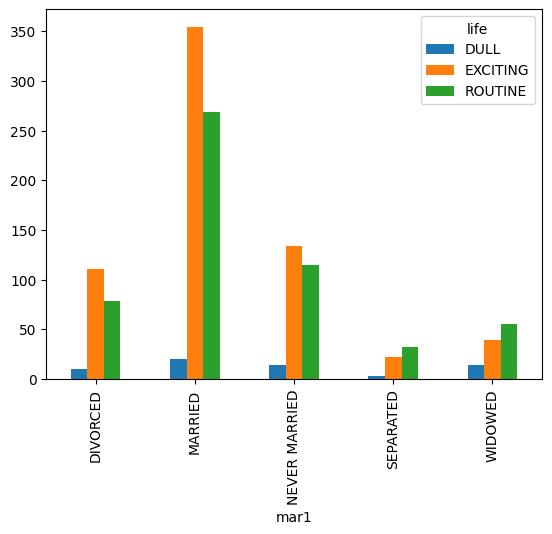

In [ ]:
datatable.plot(kind='bar')

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(datatable)

Chi2ContingencyResult(statistic=32.535800204049536, pvalue=7.464877390427598e-05, dof=8, expected_freq=array([[  9.59874115, 103.8552321 ,  86.54602675],
       [ 30.85995279, 333.8945712 , 278.245476  ],
       [ 12.62234461, 136.56963021, 113.80802518],
       [  2.73564123,  29.59874115,  24.66561762],
       [  5.18332022,  56.08182533,  46.73485445]]))

In [ ]:
pvalue=7.464877390427598e-05
if(pvalue < 0.05):
  print('null hypothesis is rejected, Ha- There is influence of marital status on life satisfaction')
else:
  print('null hypothesis is accepted, H0- There is no influence of marital status on life satisfaction')

null hypothesis is rejected, Ha- There is influence of marital status on life satisfaction


In [ ]:
#effect size
chi2table= sp.ts_pearson_ind(data3['mar1'],data3['life'])
chi2table

,n,n rows,n col.,statistic,df,p-value,min. exp.,prop. exp. below 5,test
0,1271.0,5,3,32.5358,8,0.000075,2.735641,0.066667,Pearson chi-square test of independence


In [ ]:
n = chi2table['n'][0]
rows = chi2table['n rows'][0]
cols = chi2table['n col.'][0]
stats = chi2table['statistic'][0]

V= sp.es_cramer_v_ind(stats,n,rows,cols)
V

0.11313395589484188

In [ ]:
df= min(rows,cols)-1
if df == 1:
    if V < 0.10:
        qual = 'negligible'
    elif V < 0.30:
        qual = 'small'
    elif V < 0.50:
        qual = 'medium'
    else:
        qual = 'large'
elif df == 2:
    if V < 0.07:
        qual = 'negligible'
    elif V < 0.21:
        qual = 'small'
    elif V < 0.35:
        qual = 'medium'
    else:
        qual = 'large'
elif df == 3:
    if V < 0.06:
        qual = 'negligible'
    elif V < 0.17:
        qual = 'small'
    elif V < 0.29:
        qual = 'medium'
    else:
        qual = 'large'
elif df == 4:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.15:
        qual = 'small'
    elif V < 0.25:
        qual = 'medium'
    else:
        qual = 'large'
else:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.13:
        qual = 'small'
    elif V < 0.22:
        qual = 'medium'
    else:
        qual = 'large'

qual

'small'

In [ ]:
#Result - Null hypothesis is rejected and effect size is small

## Nominal and ordinal data

In [ ]:
data4 = pd.read_csv('StudentStatistics.csv', sep=';')
data4.head()

In [ ]:
datatab = pd.crosstab(data4['Location'],data4['Mix_NrAct'])
datatab

Mix_NrAct,0.0,1.0,2.0,3.0,4.0
Location,,,,,
Diemen,1,0,8,6,2
Haarlem,1,2,12,4,0
Rotterdam,0,3,7,5,0


In [ ]:
data4['Mix_NrAct'].value_counts().index
code = {'Far too little':0, 'too little':1, 'Enough':2, 'Too much':3, 'Far too much':4}

/usr/local/lib/python3.10/dist-packages/stikpetP/visualisations/vis_bar_stacked_multiple.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordField = ordField.replace(levels)


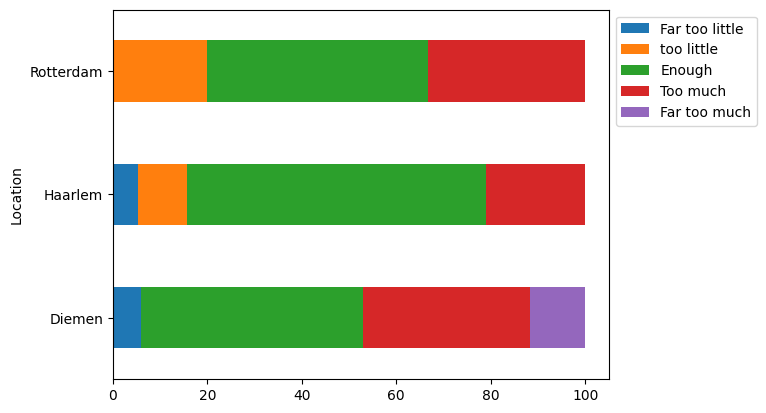

In [ ]:
datavis = sp.vi_bar_stacked_multiple(data4['Location'],data4['Mix_NrAct'],coding)

In [ ]:
data4['Mix_NrAct'] = data4['Mix_NrAct'].replace(code)

rotterdamScore = data4['Mix_NrAct'][data4['Location'] == 'Rotterdam'].dropna()
haarlemScore = data4['Mix_NrAct'][data4['Location'] == 'Haarlem'].dropna()
diemenScore = data4['Mix_NrAct'][data4['Location'] == 'Diemen'].dropna()

from scipy.stats import kruskal
kruskal(rotterdamScore,haarlemScore,diemenScore)


KruskalResult(statistic=3.335068971240797, pvalue=0.1887117641109804)

In [ ]:
pvalue=0.1887117641109804

if(pvalue < 0.05):
  print('null hypothesis is rejected, Ha- There is influence of location on number of activities')
else:
  print('null hypothesis is accepted, H0- There is no influence of location on number of activities')

null hypothesis is accepted, H0- There is no influence of location on number of activities


In [ ]:
#effect size epsilon squared test

#x -> nomianl data - place of school
#y -> ordinal data - feeling of number of activity

# x has no ifluence on y

#H -> test statistics
H = 3.335068971240797

#n -> no. of cases
n = datatab.sum().sum()
print(H , n)

eps = H * ((n+1) / (n**2-1))
print(eps)

if(eps < 0.01):
  print('neglible')
elif(eps <0.04):
  print('weak')
elif(eps <0.16):
  print('moderate')
elif(eps <0.36):
  print('relatively strong')
elif(eps <0.64):
  print('strong')
else:
  print('very strong')


3.335068971240797 51
0.06670137942481594
moderate


In [ ]:
#result-
#The Kruskal wallis test has found that there is no influence of location on number of activities (pvalue = 0.188)

#further the epsilon squared effect is moderate (eps - 0.044)

## Nomial and scale data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data5 = pd.read_csv('StudentStatistics.csv', sep=';')
data5.head()

In [ ]:
data5['Location'].value_counts()

,count
Location,
Haarlem,22
Diemen,17
Rotterdam,16


In [ ]:
data5['Over_Grade'].dropna()

In [ ]:
data5.groupby('Location')['Over_Grade'].agg(['mean','std','median','min','max'])

,mean,std,median,min,max
Location,,,,,
Diemen,74.625000,14.536735,70.0,40.0,100.0
Haarlem,51.947368,19.432143,45.0,20.0,90.0
Rotterdam,47.153846,26.807481,50.0,10.0,98.0


In [ ]:
diemenScore1= data5['Over_Grade'][data5['Location'] == 'Diemen']
haarlemScore1= data5['Over_Grade'][data5['Location'] == 'Haarlem']
rotterdamScore1= data5['Over_Grade'][data5['Location'] == 'Rotterdam']


Text(0, 0.5, 'Frequency')

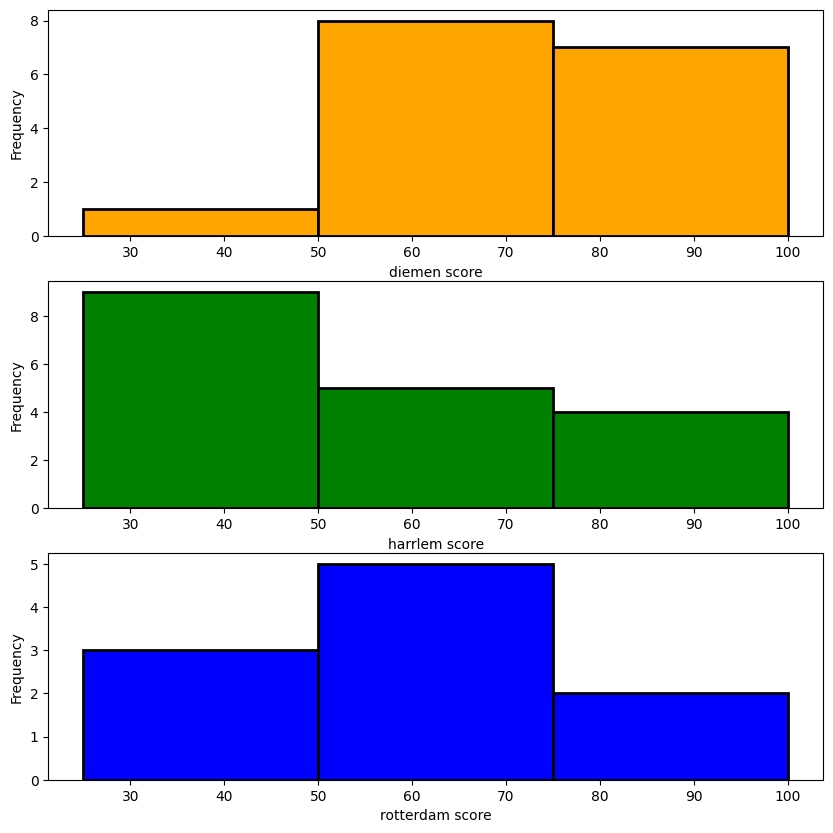

In [ ]:
plt.figure(1,figsize=(10,10))

plt.subplot(3,1,1)
plt.hist(diemenScore1, bins=[25,50,75,100], color='orange', edgecolor='black', lw=2)
plt.xlabel('diemen score')
plt.ylabel('Frequency')

plt.subplot(3,1,2)
plt.hist(haarlemScore1, bins=[25,50,75,100], color='green', edgecolor='black', lw=2)
plt.xlabel('harrlem score')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
plt.hist(rotterdamScore1, bins=[25,50,75,100], color='blue', edgecolor='black', lw=2)
plt.xlabel('rotterdam score')
plt.ylabel('Frequency')

In [ ]:
# welch ANOV (Analysis of Variance)

#h0-> There is no influence of location on grade
#ha-> There is influence of location on grade

!pip install pingouin
import pingouin as pin
pin.welch_anova(dv='Over_Grade', between='Location', data=data5)


In [ ]:
pvalue = 0.000536

if(pvalue < 0.05):
  print('null hypothesis is rejected, Ha- There is influence of location on grade')
else:
  print('null hypothesis is accepted, H0- There is no influence of location on grade')



null hypothesis is rejected, Ha- There is influence of location on grade


In [ ]:
#effect size -> eta squared (np2)

eta_sqr = 0.263336

if(eta_sqr < 0.01):
  print('neglible')
elif(eta_sqr <0.06):
  print('small')
elif(eta_sqr <0.14):
  print('medium')
elif(eta_sqr <0.22):
  print('large')
else:
  print('very large')

very large


In [ ]:
#The welch ANOV as found that there is influence of location on marks
#The effect size according to eta squared test is very large

## Ordinal vs Ordinal

In [ ]:
data6= pd.read_csv('StudentStatistics.csv', sep=';')
data6.head()


In [ ]:
data6['Teach_Motivate'].value_counts()

,count
Teach_Motivate,
Fully Disagree,20
Neither disagree nor agree,12
Disagree,9
Agree,7
Fully agree,6


In [ ]:
data6['Teach_LinkTheory'].value_counts()

,count
Teach_LinkTheory,
Neither disagree nor agree,16
Disagree,12
Fully Disagree,11
Agree,8
Fully agree,7


In [ ]:
datavis2 = pd.crosstab(data6['Teach_Motivate'],data6['Teach_LinkTheory'])
datavis2

Teach_LinkTheory,Agree,Disagree,Fully Disagree,Fully agree,Neither disagree nor agree
Teach_Motivate,,,,,
Agree,4,0,0,0,3
Disagree,1,5,1,0,2
Fully Disagree,0,7,10,0,3
Fully agree,1,0,0,5,0
Neither disagree nor agree,2,0,0,2,8


<Axes: xlabel='Teach_Motivate'>

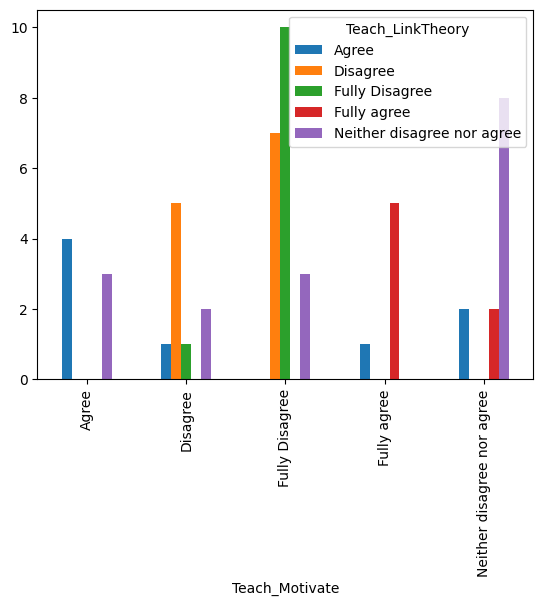

In [ ]:
datavis2.plot(kind='bar')

In [ ]:
#Goodman Kruskal Gamma

#H0 -> There is no influence of teacher_motivates on teacher link theory
#ha -> There is influence of teacher_motivates on teacher link theory

#effect size -> Gamma effect size

from scipy.stats import norm

def goodmanKruskalgamma(data, ordinal1, ordinal2, orderLabels1, orderLabels2=None):
    myCrosstable = pd.crosstab(data[ordinal1], data[ordinal2])

    myCrosstable = myCrosstable.reindex(orderLabels1)

    if orderLabels2 == None:
        myCrosstable = myCrosstable[orderLabels1]
    else:
        myCrosstable = myCrosstable[orderLabels2]

    nRows = myCrosstable.shape[0]
    nCols = myCrosstable.shape[1]


    C = [[0 for x in range(nCols)] for y in range(nRows)]

    # top left part
    for i in range(nRows):
        for j in range(nCols):
            h = i-1
            k = j-1
            if h>=0 and k>=0:
                for p in range(h+1):
                    for q in range(k+1):
                        C[i][j] = C[i][j] + list(myCrosstable.iloc[p])[q]

    # bottom right part
    for i in range(nRows):
        for j in range(nCols):
            h = i+1
            k = j+1
            if h<nRows and k<nCols:
                for p in range(h, nRows):
                    for q in range(k, nCols):
                        C[i][j] = C[i][j] + list(myCrosstable.iloc[p])[q]

    D = [[0 for x in range(nCols)] for y in range(nRows)]

    # bottom left part
    for i in range(nRows):
        for j in range(nCols):
            h = i+1
            k = j-1
            if h<nRows and k>=0:
                for p in range(h, nRows):
                    for q in range(k+1):
                        D[i][j] = D[i][j] + list(myCrosstable.iloc[p])[q]

    # top right part
    for i in range(nRows):
        for j in range(nCols):
            h = i-1
            k = j+1
            if h>=0 and k<nCols:
                for p in range(h+1):
                    for q in range(k, nCols):
                        D[i][j] = D[i][j] + list(myCrosstable.iloc[p])[q]

    P = 0
    Q = 0
    for i in range(nRows):
        for j in range(nCols):
            P = P + C[i][j] * list(myCrosstable.iloc[i])[j]
            Q = Q + D[i][j] * list(myCrosstable.iloc[i])[j]

    GKgamma = (P - Q) / (P + Q)

    if abs(GKgamma) < .10:
        qual = 'Negligible'
    elif abs(GKgamma) < .20:
        qual = 'Weak'
    elif abs(GKgamma) < .40:
        qual = 'Moderate'
    elif abs(GKgamma) < .60:
        qual = 'Relatively strong'
    elif abs(GKgamma) < .80:
        qual = 'Strong'
    else:
        qual = 'Very strong'

    n = myCrosstable.sum().sum()

    Z1 = GKgamma * ((P + Q) / (n * (1 - GKgamma**2)))**0.5

    forASE0 = 0
    forASE1 = 0
    for i in range(nRows):
        for j in range(nCols):
            forASE0 = forASE0 + list(myCrosstable.iloc[i])[j] * (Q * C[i][j] - P * D[i][j])**2
            forASE1 = forASE1 + list(myCrosstable.iloc[i])[j] * (C[i][j] - D[i][j])**2

    ASE0 = 4 * (forASE0)**0.5 / (P + Q)**2
    ASE1 = 2 * (forASE1 - (P - Q)**2 / n)**0.5 / (P + Q)
    Z2 = GKgamma / ASE0
    Z3 = GKgamma / ASE1

    p1 = norm.sf(Z1)
    p2 = norm.sf(Z2)
    p3 = norm.sf(Z3)

    zvalues = [Z1] + [Z2] + [Z3]
    pvalues = [p1] + [p2] + [p3]

    return (GKgamma,qual), zvalues, pvalues




In [ ]:
data6['Teach_Motivate'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', nan, 'Agree'], dtype=object)

In [ ]:
ordinalvar1= ['Fully Disagree','Disagree','Neither disagree nor agree', 'Agree','Fully agree']
ordinalvar2= ['Fully Disagree','Disagree','Neither disagree nor agree', 'Agree','Fully agree']

In [ ]:
goodmanKruskalgamma(data6,'Teach_Motivate','Teach_LinkTheory',ordinalvar1,ordinalvar2)

((0.8768577494692145, 'Very strong'),
 [10.773417534483025, 20.604715459769057, 13.303495586919903],
 [2.2980867366283263e-27, 1.2448922299482576e-94, 1.104473066321668e-40])

In [ ]:

pvalue = 1.104473066321668e-40

if(pvalue < 0.05):
  print('null hypothesis is rejected, Ha- There is influence of teacher_motivates on teacher link theory')
else:
  print('null hypothesis is accepted, H0- There is no influence of teacher_motivates on teacher link theory')

#effect_size -> 0.8768577494692145 'Very strong'


null hypothesis is rejected, Ha- There is influence of teacher_motivates on teacher link theory


In [ ]:
#There is influence of teacher motivate on teacher link theory as per the goodman Kruskal gamma test
#The effect size is very strong

## ordianl and scale data

In [ ]:
data6['Teach_Motivate'].value_counts()

In [ ]:
data6.groupby('Teach_Motivate')['Over_Grade'].agg(['mean','std','median','min','max'])

,mean,std,median,min,max
Teach_Motivate,,,,,
Agree,78.000000,12.179217,75.0,65.0,98.0
Disagree,52.777778,18.219343,50.0,20.0,80.0
Fully Disagree,36.812500,14.725120,38.0,10.0,65.0
Fully agree,84.600000,10.526158,85.0,70.0,98.0
Neither disagree nor agree,69.181818,16.898628,70.0,30.0,100.0


<Axes: xlabel='Over_Grade', ylabel='Count'>

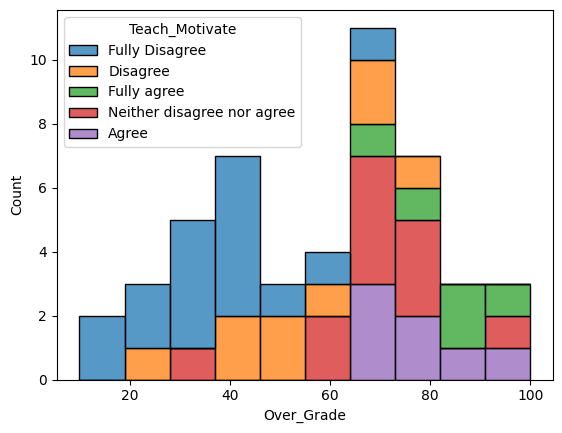

In [ ]:
import seaborn as sb
sb.histplot(data=data6, x='Over_Grade', hue='Teach_Motivate', bins=10, multiple='stack')

In [ ]:
data6['Teach_Motivate'].value_counts().index

Index(['Fully Disagree', 'Neither disagree nor agree', 'Disagree', 'Agree',
       'Fully agree'],
      dtype='object', name='Teach_Motivate')

In [ ]:
code1 = {'Fully Disagree':0, 'Disagree':1, 'Neither disagree nor agree':2, 'Agree':3,
       'Fully agree':4}
mydata=data6[['Teach_Motivate','Over_Grade']]
mydata['Teach_Motivate'] = mydata['Teach_Motivate'].replace(code1)

In [ ]:
mydata.corr(method='spearman')

,Teach_Motivate,Over_Grade
Teach_Motivate,1.0000,0.7872
Over_Grade,0.7872,1.0000


In [ ]:
from scipy.stats import spearmanr
spearmanr(mydata, nan_policy='omit')

SignificanceResult(statistic=0.7871998951252405, pvalue=3.236363793284169e-11)

In [ ]:
pvalue=3.236363793284169e-11
statistic=0.7871998951252405
if(pvalue < 0.05):
  print('null hypothesis is rejected, there is influence of teacher motivates on marks')
else:
  print('null hypothesis is accepted, there is no influence of teacher motivates on marks')

null hypothesis is rejected, there is influence of teacher motivates on marks


In [ ]:
#effect size -> rho
rho = abs(statistic)
rho

if(rho < 0.10):
  print('neglible')
elif(rho <0.30):
  print('small')
elif(rho <0.50):
  print('medium')
elif(rho <0.70):
  print('large')
else:
  print('very large')

very large


In [ ]:
#There is a very large positive impact/influence of teacher motivates on marks

## scale vs scale data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data7 = pd.read_csv('StudentStatistics.csv', sep=';')
data7.head()

In [ ]:
data7[['Gen_Age','Over_Grade']].describe()

,Gen_Age,Over_Grade
count,44.000000,48.000000
mean,24.454545,58.208333
std,15.144965,23.171845
min,18.000000,10.000000
25%,19.000000,40.000000
50%,21.000000,64.000000
75%,24.250000,75.000000
max,119.000000,100.000000


In [ ]:
mydf = data7[['Gen_Age','Over_Grade']].dropna()

from scipy.stats import pearsonr
pearsonr(mydf['Gen_Age'],mydf['Over_Grade'])

PearsonRResult(statistic=-0.06061251564426085, pvalue=0.7139570447292615)

In [ ]:
pvalue=0.7139570447292615

#if statistics value is negative it means that when the age increases the marks decreases
if(pvalue<0.05):
  print('null hypothesis is rejected, there is influence of age on marks')
else:
  print('null hypothesis is accepted, there is no influence of age on marks')

null hypothesis is accepted, there is no influence of age on marks


In [ ]:
#effect size
statistic=-0.06061251564426085
rho = abs(statistic)
rho

if(rho < 0.01):
  print('negligible')
elif(rho <0.04):
  print('weak')
elif(rho < 0.06):
  print('moderate')
elif(rho < 0.08):
  print('relatively strong')
elif(rho < 0.10):
  print('strong')
else:
  print('very strong')

relatively strong


In [ ]:
#The age does not have statistical significance.
#pvalue=0.713
#rho = 0.060

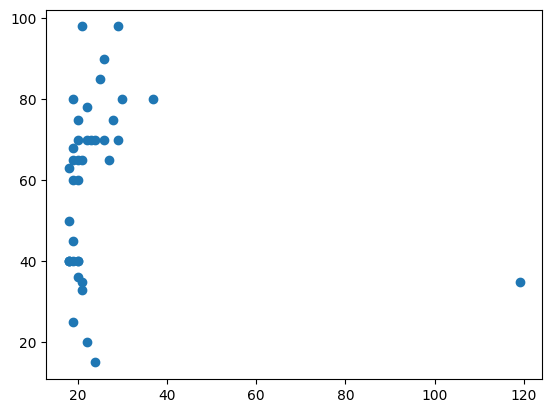

In [ ]:
plt.scatter(data7['Gen_Age'],data7['Over_Grade'])
plt.show()